# Simple example: white vs black dot on a gray background

### Importing Dependencies

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [35]:
tf.compat.v1.enable_eager_execution()
tf.config.run_functions_eagerly(True)

### Preparing data

In [2]:
input_shape = (17, 17)
im_1 = np.zeros(input_shape)+0.5
im_2 = im_1.copy()
im_1[7][7]+=0.5
im_2[7][7]-=0.5

In [3]:
im_1

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0

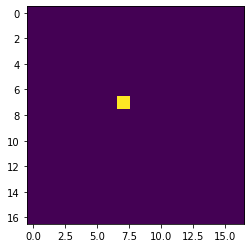

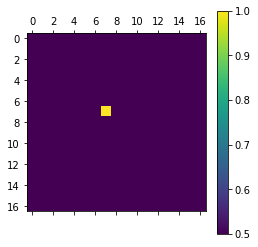

In [4]:
plt.imshow(im_1)
plt.matshow(im_1)
plt.colorbar()
plt.show()

In [5]:
def create_dataset_dots(k=100):
    input_shape = (k, k)
    X_1 = np.zeros(input_shape)+0.5
    X_2 = X_1.copy()
    X_1[k//2][k//2]+=0.5
    X_2[k//2][k//2]-=0.5
    Xs = np.stack([X_1, X_2], axis=0)
    ys = np.array([1, 0])
    return Xs, ys


 ### Defining the models

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Flatten, Dense, Lambda

# cnn without padding
def create_small_cnn_np(k):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(k, k, 1)))
    model.add(Conv2D(512, kernel_size=k))
    model.add(Activation('relu'))
    model.add(GlobalAveragePooling2D())
    #model.add(Dense(2))
    model.add(Dense(2, activation="softmax"))
    return model

def create_fcn(k):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(k, k, 1)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    return model

def circular_padding(x, padding_size):
    # Perform circular padding on the input tensor
    return tf.pad(x, [[0, 0], [padding_size, padding_size], [padding_size, padding_size], [0, 0]], mode='SYMMETRIC')


def create_small_cnn(k, padding_size=8):
    model = Sequential()
    model.add(BatchNormalization(input_shape=(k, k, 1)))
    model.add(Lambda(lambda x: circular_padding(x, padding_size)))
    model.add(Conv2D(512, kernel_size=17, padding='valid'))
    model.add(Activation('relu'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation="softmax"))

    return model

k = 17
small_cnn_model = create_small_cnn_np(k)
small_cnn_model_padding = create_small_cnn(k)
fcn_model = create_fcn(k)


In [7]:
input_shape = (k, k)
im_1 = np.zeros(input_shape)+0.5
im_2 = im_1.copy()
im_1[7][7]+=0.5
im_2[7][7]-=0.5

In [8]:
# im_1 = im_1.
data = np.stack([np.expand_dims(im_1, axis=-1), np.expand_dims(im_2, axis=-1)], axis=0)
y = np.array([1, 0])

 ### Training the models

#### Training CNN

In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
criterion = SparseCategoricalCrossentropy()
batch_X, batch_y = tf.constant(data, dtype=tf.float32), tf.constant(y, dtype=tf.int32)



small_cnn_model.summary()
LR = 0.01
opt = SGD(learning_rate=LR)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 17, 17, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 1, 1, 512)         148480    
                                                                 
 activation (Activation)     (None, 1, 1, 512)         0         
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 149,510
Trainable params: 149,508
Non-trai

In [10]:
for idx in range(2000):
    total_loss = 0
    total_acc = 0

    with tf.GradientTape() as tape:
        output = small_cnn_model(batch_X, training=True)
        loss = criterion(batch_y, output)

    gradients = tape.gradient(loss, small_cnn_model.trainable_variables)
    opt.apply_gradients(zip(gradients, small_cnn_model.trainable_variables))

    total_loss += loss * tf.cast(tf.shape(batch_y)[0], dtype=tf.float32)
    total_acc += tf.reduce_sum(tf.cast(tf.math.argmax(output, axis=1) == tf.cast(batch_y, dtype=tf.int64), tf.float32)).numpy()


    if (idx + 1) % 800 == 0:
        LR /= 10
        opt.learning_rate.assign(LR)

    if (idx + 1) % 100 == 0:
        print("Epoch: {}, Train Acc: {:.3f}, Loss: {:.3f}".format(
            idx + 1, total_acc * 100. / y.shape[0], total_loss / y.shape[0]
        ))

Epoch: 100, Train Acc: 100.000, Loss: 0.006
Epoch: 200, Train Acc: 100.000, Loss: 0.003
Epoch: 300, Train Acc: 100.000, Loss: 0.002
Epoch: 400, Train Acc: 100.000, Loss: 0.001
Epoch: 500, Train Acc: 100.000, Loss: 0.001
Epoch: 600, Train Acc: 100.000, Loss: 0.001
Epoch: 700, Train Acc: 100.000, Loss: 0.001
Epoch: 800, Train Acc: 100.000, Loss: 0.001
Epoch: 900, Train Acc: 100.000, Loss: 0.001
Epoch: 1000, Train Acc: 100.000, Loss: 0.001
Epoch: 1100, Train Acc: 100.000, Loss: 0.001
Epoch: 1200, Train Acc: 100.000, Loss: 0.000
Epoch: 1300, Train Acc: 100.000, Loss: 0.000
Epoch: 1400, Train Acc: 100.000, Loss: 0.000
Epoch: 1500, Train Acc: 100.000, Loss: 0.000
Epoch: 1600, Train Acc: 100.000, Loss: 0.000
Epoch: 1700, Train Acc: 100.000, Loss: 0.000
Epoch: 1800, Train Acc: 100.000, Loss: 0.000
Epoch: 1900, Train Acc: 100.000, Loss: 0.000
Epoch: 2000, Train Acc: 100.000, Loss: 0.000


#### Training CNN with padding

In [12]:
data = np.stack([np.expand_dims(im_1, axis=-1), np.expand_dims(im_2, axis=-1)], axis=0)
y = np.array([1, 0])
criterion = SparseCategoricalCrossentropy()
batch_X, batch_y = tf.constant(data, dtype=tf.float32), tf.constant(y, dtype=tf.int32)
small_cnn_model_padding.summary()
LR = 0.01
opt = SGD(learning_rate=LR)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 17, 17, 1)        4         
 hNormalization)                                                 
                                                                 
 lambda (Lambda)             (None, 33, 33, 1)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 512)       148480    
                                                                 
 activation_1 (Activation)   (None, 17, 17, 512)       0         
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 2)                

In [13]:
for idx in range(2000):
    total_loss = 0
    total_acc = 0

    with tf.GradientTape() as tape:
        output = small_cnn_model_padding(batch_X, training=True)
        loss = criterion(batch_y, output)

    gradients = tape.gradient(loss, small_cnn_model_padding.trainable_variables)
    opt.apply_gradients(zip(gradients, small_cnn_model_padding.trainable_variables))

    total_loss += loss * tf.cast(tf.shape(batch_y)[0], dtype=tf.float32)
    total_acc += tf.reduce_sum(tf.cast(tf.math.argmax(output, axis=1) == tf.cast(batch_y, dtype=tf.int64), tf.float32)).numpy()


    if (idx + 1) % 800 == 0:
        LR /= 10
        opt.learning_rate.assign(LR)

    if (idx + 1) % 100 == 0:
        print("Epoch: {}, Train Acc: {:.3f}, Loss: {:.3f}".format(idx + 1, total_acc * 100. / y.shape[0], total_loss / y.shape[0]))

Epoch: 100, Train Acc: 100.000, Loss: 0.546
Epoch: 200, Train Acc: 100.000, Loss: 0.356
Epoch: 300, Train Acc: 100.000, Loss: 0.194
Epoch: 400, Train Acc: 100.000, Loss: 0.104
Epoch: 500, Train Acc: 100.000, Loss: 0.062
Epoch: 600, Train Acc: 100.000, Loss: 0.041
Epoch: 700, Train Acc: 100.000, Loss: 0.029
Epoch: 800, Train Acc: 100.000, Loss: 0.022
Epoch: 900, Train Acc: 100.000, Loss: 0.021
Epoch: 1000, Train Acc: 100.000, Loss: 0.021
Epoch: 1100, Train Acc: 100.000, Loss: 0.020
Epoch: 1200, Train Acc: 100.000, Loss: 0.020
Epoch: 1300, Train Acc: 100.000, Loss: 0.019
Epoch: 1400, Train Acc: 100.000, Loss: 0.019
Epoch: 1500, Train Acc: 100.000, Loss: 0.018
Epoch: 1600, Train Acc: 100.000, Loss: 0.018
Epoch: 1700, Train Acc: 100.000, Loss: 0.018
Epoch: 1800, Train Acc: 100.000, Loss: 0.018
Epoch: 1900, Train Acc: 100.000, Loss: 0.018
Epoch: 2000, Train Acc: 100.000, Loss: 0.018


#### Training FCN

In [14]:
data = np.stack([np.expand_dims(im_1, axis=-1), np.expand_dims(im_2, axis=-1)], axis=0)
y = np.array([1, 0])
criterion = SparseCategoricalCrossentropy()
batch_X, batch_y = tf.constant(data, dtype=tf.float32), tf.constant(y, dtype=tf.int32)
fcn_model.summary()
LR = 0.01
opt = SGD(learning_rate=LR)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 17, 17, 1)        4         
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 289)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               148480    
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 149,510
Trainable params: 149,508
Non-trainable params: 2
_________________________________________________________________


In [15]:
for idx in range(2000):
    total_loss = 0
    total_acc = 0

    with tf.GradientTape() as tape:
        output = fcn_model(batch_X, training=True)
        loss = criterion(batch_y, output)

    gradients = tape.gradient(loss, fcn_model.trainable_variables)
    opt.apply_gradients(zip(gradients, fcn_model.trainable_variables))

    total_loss += loss * tf.cast(tf.shape(batch_y)[0], dtype=tf.float32)
    total_acc += tf.reduce_sum(
        tf.cast(tf.math.argmax(output, axis=1) == tf.cast(batch_y, dtype=tf.int64), tf.float32)
    ).numpy()

    if (idx + 1) % 800 == 0:
        LR /= 10
        opt.learning_rate.assign(LR)

    if (idx + 1) % 100 == 0:
        print("Epoch: {}, Train Acc: {:.3f}, Loss: {:.3f}".format(
            idx + 1, total_acc * 100. / y.shape[0], total_loss / y.shape[0]
        ))



Epoch: 100, Train Acc: 100.000, Loss: 0.004
Epoch: 200, Train Acc: 100.000, Loss: 0.002
Epoch: 300, Train Acc: 100.000, Loss: 0.001
Epoch: 400, Train Acc: 100.000, Loss: 0.001
Epoch: 500, Train Acc: 100.000, Loss: 0.001
Epoch: 600, Train Acc: 100.000, Loss: 0.001
Epoch: 700, Train Acc: 100.000, Loss: 0.000
Epoch: 800, Train Acc: 100.000, Loss: 0.000
Epoch: 900, Train Acc: 100.000, Loss: 0.000
Epoch: 1000, Train Acc: 100.000, Loss: 0.000
Epoch: 1100, Train Acc: 100.000, Loss: 0.000
Epoch: 1200, Train Acc: 100.000, Loss: 0.000
Epoch: 1300, Train Acc: 100.000, Loss: 0.000
Epoch: 1400, Train Acc: 100.000, Loss: 0.000
Epoch: 1500, Train Acc: 100.000, Loss: 0.000
Epoch: 1600, Train Acc: 100.000, Loss: 0.000
Epoch: 1700, Train Acc: 100.000, Loss: 0.000
Epoch: 1800, Train Acc: 100.000, Loss: 0.000
Epoch: 1900, Train Acc: 100.000, Loss: 0.000
Epoch: 2000, Train Acc: 100.000, Loss: 0.000


We get the same result as the paper code. For the training (the loss value is a little different but its probably because of using different frameworks but the behaviour is the same)

### Generating Adversarial data

The paper used DDNL2Attack for the plot of comparing the distance between original data and adversarial data for both CNN and FCN. This attack is not available in tensorflow, so we will use the FGM and PGD attacks only.

#### PGD:

In [82]:
from art.attacks.evasion import ProjectedGradientDescent
from art.estimators.classification import TensorFlowV2Classifier

In [83]:
# Define the loss object for each classifier
small_cnn_padding_loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
fcn_loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
small_cnn_loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

In [84]:
distances_small_cnn_model = []
distances_small_cnn_model_padding = []
distances_fcn_model = []
accuracies_small_cnn_model = []
accuracies_small_cnn_model_padding = []
accuracies_fcn_model = []

In [85]:
small_cnn_model.compile(optimizer='adam', loss=small_cnn_loss_object, metrics=['accuracy'])
classifier = TensorFlowV2Classifier(
    model=small_cnn_model,
    loss_object=small_cnn_loss_object,
    input_shape=(17, 17, 1),
    nb_classes=10,
    clip_values=(0, 1),
)
eps_values = [0.001, 0.002, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5]

for eps in eps_values:
    adversary = ProjectedGradientDescent(estimator=classifier, eps=eps, max_iter=100)
    small_cnn_adv_x = adversary.generate(x=batch_X.numpy(), y=batch_y.numpy())
    distance_small_cnn_model = np.linalg.norm(batch_X - small_cnn_adv_x)
    distances_small_cnn_model.append(distance_small_cnn_model)
    # Evaluate the adversarial data with your model
    accuracy = small_cnn_model.evaluate(small_cnn_adv_x, batch_y)
    accuracy_value = accuracy[1] * 100
    accuracies_small_cnn_model.append(accuracy_value)
    print("Epsilon: {}, Robust Accuracy: {}".format(eps, accuracy_value))

PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 416ms/step - loss: 4.9471e-04 - accuracy: 1.0000
Epsilon: 0.001, Robust Accuracy: 100.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 65ms/step - loss: 5.2069e-04 - accuracy: 1.0000
Epsilon: 0.002, Robust Accuracy: 100.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 24ms/step - loss: 6.0713e-04 - accuracy: 1.0000
Epsilon: 0.005, Robust Accuracy: 100.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 33ms/step - loss: 7.8433e-04 - accuracy: 1.0000
Epsilon: 0.01, Robust Accuracy: 100.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 31ms/step - loss: 0.0061 - accuracy: 1.0000
Epsilon: 0.05, Robust Accuracy: 100.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 34ms/step - loss: 0.0709 - accuracy: 1.0000
Epsilon: 0.1, Robust Accuracy: 100.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 31ms/step - loss: 6.5160 - accuracy: 0.0000e+00
Epsilon: 0.3, Robust Accuracy: 0.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 40ms/step - loss: 16.5846 - accuracy: 0.0000e+00
Epsilon: 0.5, Robust Accuracy: 0.0


In [86]:
fcn_model.compile(optimizer='adam', loss=fcn_loss_object, metrics=['accuracy'])
classifier = TensorFlowV2Classifier(
    model=fcn_model,
    loss_object=fcn_loss_object,
    input_shape=(17, 17, 1),
    nb_classes=10,
    clip_values=(0, 1),
)
eps_values = [0.001, 0.002, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5]
for eps in eps_values:
    adversary = ProjectedGradientDescent(estimator=classifier, eps=eps, max_iter=100)
    fcn_model_adv_x = adversary.generate(x=batch_X.numpy(), y=batch_y.numpy())
    distance_fcn_model = np.linalg.norm(batch_X - fcn_model_adv_x)
    distances_fcn_model.append(distance_fcn_model)
    # Evaluate the fcn_model data with your model
    accuracy = fcn_model.evaluate(fcn_model_adv_x, batch_y)
    accuracy_value = accuracy[1] * 100
    accuracies_fcn_model.append(accuracy_value)
    print("Epsilon: {}, Robust Accuracy: {}".format(eps, accuracy_value))

PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 273ms/step - loss: 5.5798e-04 - accuracy: 1.0000
Epsilon: 0.001, Robust Accuracy: 100.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 24ms/step - loss: 8.6389e-04 - accuracy: 1.0000
Epsilon: 0.002, Robust Accuracy: 100.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 29ms/step - loss: 0.0032 - accuracy: 1.0000
Epsilon: 0.005, Robust Accuracy: 100.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 31ms/step - loss: 0.0274 - accuracy: 1.0000
Epsilon: 0.01, Robust Accuracy: 100.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 29ms/step - loss: 6.7476 - accuracy: 0.0000e+00
Epsilon: 0.05, Robust Accuracy: 0.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 31ms/step - loss: 30.1610 - accuracy: 0.0000e+00
Epsilon: 0.1, Robust Accuracy: 0.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 27ms/step - loss: 117.7565 - accuracy: 0.0000e+00
Epsilon: 0.3, Robust Accuracy: 0.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 26ms/step - loss: 203.2393 - accuracy: 0.0000e+00
Epsilon: 0.5, Robust Accuracy: 0.0


In [87]:
small_cnn_model_padding.compile(optimizer='adam', loss=small_cnn_padding_loss_object, metrics=['accuracy'])
classifier = TensorFlowV2Classifier(
    model=small_cnn_model_padding,
    loss_object=small_cnn_padding_loss_object,
    input_shape=(17, 17, 1),
    nb_classes=10,
    clip_values=(0, 1),
)
eps_values = [0.001, 0.002, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5]
for eps in eps_values:
    adversary = ProjectedGradientDescent(estimator=classifier, eps=eps, max_iter=100)
    small_cnn_model_padding_adv_x = adversary.generate(x=batch_X.numpy(), y=batch_y.numpy())
    distance_small_cnn_model_padding = np.linalg.norm(batch_X - small_cnn_model_padding_adv_x)
    distances_small_cnn_model_padding.append(distance_small_cnn_model_padding)
    # Evaluate the fcn_model data with your model
    accuracy = small_cnn_model_padding.evaluate(small_cnn_model_padding_adv_x, batch_y)
    accuracy_value = accuracy[1] * 100
    accuracies_small_cnn_model_padding.append(accuracy_value)
    print("Epsilon: {}, Robust Accuracy: {}".format(eps, accuracy_value))

PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 265ms/step - loss: 0.1100 - accuracy: 1.0000
Epsilon: 0.001, Robust Accuracy: 100.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 59ms/step - loss: 0.6133 - accuracy: 1.0000
Epsilon: 0.002, Robust Accuracy: 100.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 34ms/step - loss: 5.1149 - accuracy: 0.0000e+00
Epsilon: 0.005, Robust Accuracy: 0.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 30ms/step - loss: 12.8155 - accuracy: 0.0000e+00
Epsilon: 0.01, Robust Accuracy: 0.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 59ms/step - loss: 73.4827 - accuracy: 0.0000e+00
Epsilon: 0.05, Robust Accuracy: 0.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 28ms/step - loss: 149.2993 - accuracy: 0.0000e+00
Epsilon: 0.1, Robust Accuracy: 0.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 29ms/step - loss: 452.5654 - accuracy: 0.0000e+00
Epsilon: 0.3, Robust Accuracy: 0.0


PGD - Batches: 0it [00:00, ?it/s]

1/1 [==============================] - 0s 34ms/step - loss: 755.8314 - accuracy: 0.0000e+00
Epsilon: 0.5, Robust Accuracy: 0.0


#### Results on PGD:

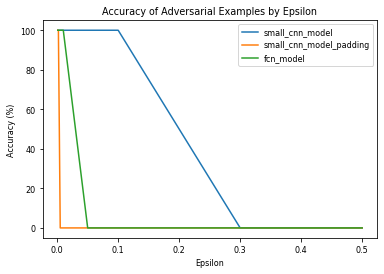

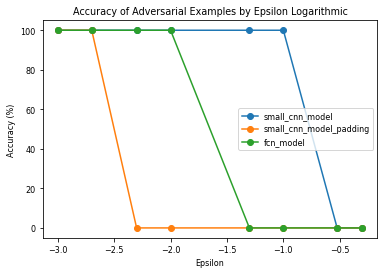

In [88]:

# Plot the accuracies for each model
plt.plot(eps_values, accuracies_small_cnn_model, label="small_cnn_model")
plt.plot(eps_values, accuracies_small_cnn_model_padding, label="small_cnn_model_padding")
plt.plot(eps_values, accuracies_fcn_model, label="fcn_model")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Adversarial Examples by Epsilon")
plt.legend()
plt.show()

plt.plot(np.log10(eps_values), accuracies_small_cnn_model, marker='o', label="small_cnn_model")
plt.plot(np.log10(eps_values), accuracies_small_cnn_model_padding, marker='o', label="small_cnn_model_padding")
plt.plot(np.log10(eps_values), accuracies_fcn_model, marker='o', label="fcn_model")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Adversarial Examples by Epsilon Logarithmic")
plt.legend()
plt.show()

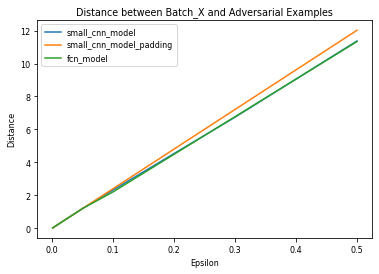

In [89]:
# Plot of the distances for each model
plt.plot(eps_values, distances_small_cnn_model, label="small_cnn_model")
plt.plot(eps_values, distances_small_cnn_model_padding, label="small_cnn_model_padding")
plt.plot(eps_values, distances_fcn_model, label="fcn_model")
plt.xlabel("Epsilon")
plt.ylabel("Distance")
plt.title("Distance between Batch_X and Adversarial Examples")
plt.legend()
plt.show()

### FGSM

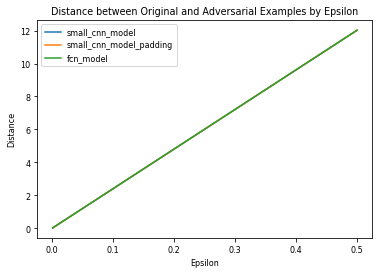

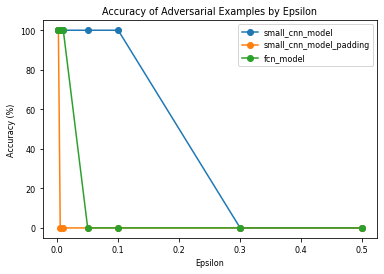

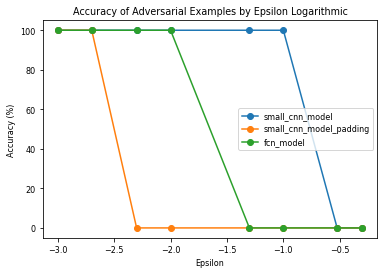

In [81]:
from art.attacks.evasion import FastGradientMethod

# [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
eps_values = [0.001, 0.002, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5]
distances_small_cnn_model = []
accuracies_small_cnn_model = []
distances_small_cnn_model_padding = []
accuracies_small_cnn_model_padding = []
distances_fcn_model = []
accuracies_fcn_model = []

for eps in eps_values:
    classifier_cnn = TensorFlowV2Classifier(
        model=small_cnn_model,
        loss_object=small_cnn_loss_object,
        input_shape=(17, 17, 1),
        nb_classes=10,
        clip_values=(0, 1),
    )
    adversary_small_cnn_model = FastGradientMethod(estimator=classifier_cnn, eps=eps)
    small_cnn_adv_x = adversary_small_cnn_model.generate(x=batch_X.numpy(), y=batch_y.numpy())

    distance_small_cnn_model = np.linalg.norm(batch_X - small_cnn_adv_x)
    distances_small_cnn_model.append(distance_small_cnn_model)
    accuracy_small_cnn_model = small_cnn_model.evaluate(small_cnn_adv_x, batch_y, verbose=0)[1] * 100
    accuracies_small_cnn_model.append(accuracy_small_cnn_model)

    classifier_cnn_p = TensorFlowV2Classifier(
        model=small_cnn_model_padding,
        loss_object=small_cnn_padding_loss_object,
        input_shape=(17, 17, 1),
        nb_classes=10,
        clip_values=(0, 1),
    )
    adversary_small_cnn_model_padding = FastGradientMethod(estimator=classifier_cnn_p, eps=eps)
    small_cnn_adv_x_padding = adversary_small_cnn_model_padding.generate(x=batch_X.numpy(), y=batch_y.numpy())

    distance_small_cnn_model_padding = np.linalg.norm(batch_X - small_cnn_adv_x_padding)
    distances_small_cnn_model_padding.append(distance_small_cnn_model_padding)
    accuracy_small_cnn_model_padding = small_cnn_model_padding.evaluate(small_cnn_adv_x_padding, batch_y, verbose=0)[1] * 100
    accuracies_small_cnn_model_padding.append(accuracy_small_cnn_model_padding)

    classifier_fcn = TensorFlowV2Classifier(
        model=fcn_model,
        loss_object=fcn_loss_object,
        input_shape=(17, 17, 1),
        nb_classes=10,
        clip_values=(0, 1),
    )
    adversary_fcn_model = FastGradientMethod(estimator=classifier_fcn, eps=eps)
    fcn_adv_x = adversary_fcn_model.generate(x=batch_X.numpy(), y=batch_y.numpy())

    distance_fcn_model = np.linalg.norm(batch_X - fcn_adv_x)
    distances_fcn_model.append(distance_fcn_model)
    accuracy_fcn_model = fcn_model.evaluate(fcn_adv_x, batch_y, verbose=0)[1] * 100
    accuracies_fcn_model.append(accuracy_fcn_model)

plt.plot(eps_values, distances_small_cnn_model, label="small_cnn_model")
plt.plot(eps_values, distances_small_cnn_model_padding, label="small_cnn_model_padding")
plt.plot(eps_values, distances_fcn_model, label="fcn_model")
plt.xlabel("Epsilon")
plt.ylabel("Distance")
plt.title("Distance between Original and Adversarial Examples by Epsilon")
plt.legend()
plt.show()

plt.plot(eps_values, accuracies_small_cnn_model, marker='o', label="small_cnn_model")
plt.plot(eps_values, accuracies_small_cnn_model_padding, marker='o', label="small_cnn_model_padding")
plt.plot(eps_values, accuracies_fcn_model, marker='o', label="fcn_model")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Adversarial Examples by Epsilon")
plt.legend()
plt.show()

plt.plot(np.log10(eps_values), accuracies_small_cnn_model, marker='o', label="small_cnn_model")
plt.plot(np.log10(eps_values), accuracies_small_cnn_model_padding, marker='o', label="small_cnn_model_padding")
plt.plot(np.log10(eps_values), accuracies_fcn_model, marker='o', label="fcn_model")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Adversarial Examples by Epsilon Logarithmic")
plt.legend()
plt.show()


## Shift Invariance

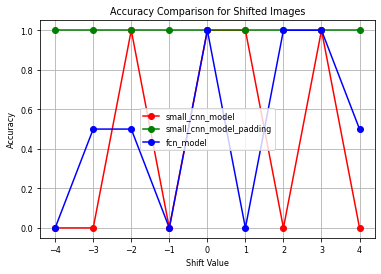

In [75]:

shift_range = 4
num_shifts = 9
shift_values = np.linspace(-shift_range, shift_range, num_shifts)

models = [small_cnn_model, small_cnn_model_padding, fcn_model]
model_names = ['small_cnn_model', 'small_cnn_model_padding', 'fcn_model']
colors = ['red', 'green', 'blue']

for model, model_name, color in zip(models, model_names, colors):
    accuracies = []
    for shift in shift_values:
        shifted = np.roll(batch_X, int(shift), axis=1)
        accuracy = model.evaluate(shifted, batch_y, verbose=0)[1]
        accuracies.append(accuracy)

    plt.plot(shift_values, accuracies, marker='o', color=color, label=model_name)


plt.xlabel('Shift Value')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Shifted Images')
plt.grid(True)
plt.legend()
plt.show()


#### For k, changing k is only interesting for DDNL2Attack

In [104]:
from art.attacks.evasion import ProjectedGradientDescent
from art.estimators.classification import TensorFlowV2Classifier
k = 17
criterion = SparseCategoricalCrossentropy()
# Create the models
small_cnn_np_model = create_small_cnn_np(k)
fcn_model = create_fcn(k)
small_cnn_model = create_small_cnn(k)

# Compile the models
small_cnn_np_model.compile(optimizer='adam', loss=criterion, metrics=['accuracy'])
fcn_model.compile(optimizer='adam', loss=criterion, metrics=['accuracy'])